# Impacta el clima en la frecuencia de los viajes?


Este proyecto esta relacionado sobre los viajes de taxi en Chicago. Trabajaremos con los datos de los competidores.

Objetivo: encontrar patrones en la información disponible. Poder comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes. Esto permitira a la nueva empresa que se encuentra en lanzamiento identificar las preferencias de los pasajeros

Etapas del analisis:

## Inicialización

In [48]:
#Importación de liberias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats as st
import seaborn as sns

## Lecura general de los datos

In [27]:
# Lectura de los datos.
df_taxis = pd.read_csv('/datasets/project_sql_result_01.csv')
df = pd.read_csv('/datasets/project_sql_result_04.csv')
df_clima = pd.read_csv('/datasets/project_sql_result_07.csv')

#Información general de los datos
df_taxis.info()
df.info()
df_clima.info()

# Las 10 primeras filas de los DataFrame
df_taxis.head()
df.head()
df_clima.head()

# Verificar si hay datos duplicados
df.duplicated().sum()
df_taxis.duplicated().sum()
df_clima.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_se

197

In [28]:
#Eliminamos los datos duplicados de la tabla df_clima
df_clima = df_clima.drop_duplicates().reset_index()

## Analisis de datos

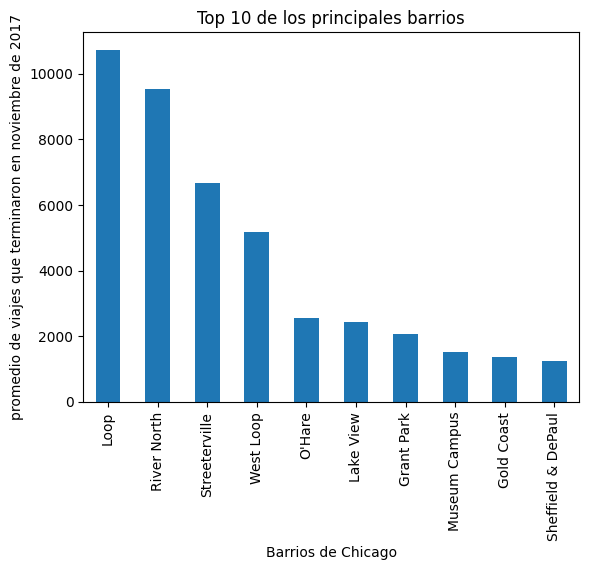

In [29]:
#Top 10 principales barrios principales barrios
top_diez_barrios = df.groupby('dropoff_location_name')['average_trips'].mean().sort_values(ascending=False).head(10)

#Diagrama de barras Top 10 principales barrios
top_diez_barrios.plot(kind='bar')
plt.title('Top 10 de los principales barrios')
plt.xlabel('Barrios de Chicago')
plt.ylabel('promedio de viajes que terminaron en noviembre de 2017')
plt.show()


Conclusiones del diagrama: 

- El barrio con el promedio mas alto en viajes es Loop, con mas de 10000 en el mes de noviembre 2017. En cambio West Loop es el barrio N° 4 con un promedio casi a la mitad (5163) del barrio con un promedio mas alto (Loop).

Top 10 empresas en relacion con los viajes: company_name
Flash Cab                            19558
Taxi Affiliation Services            11422
Medallion Leasing                    10367
Yellow Cab                            9888
Taxi Affiliation Service Yellow       9299
Chicago Carriage Cab Corp             9181
City Service                          8448
Sun Taxi                              7701
Star North Management LLC             7455
Blue Ribbon Taxi Association Inc.     5953
Name: trips_amount, dtype: int64


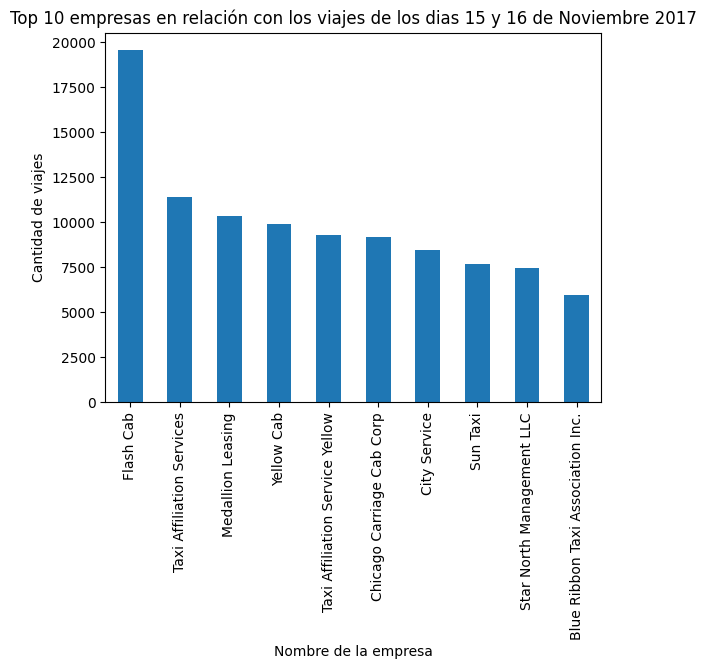

Total de viajes de las empresas Top 10: 99272

Total de viajes de todas las empresas: 137311


In [30]:
# Top 10 empresas y numero de viajes
top_diez_empresas_viajes = df_taxis.groupby('company_name')['trips_amount'].mean().sort_values(ascending=False).head(10)
print("Top 10 empresas en relacion con los viajes:", top_diez_empresas_viajes)

# Diagrama Top 10 empresas en relacion con los viajes 
top_diez_empresas_viajes.plot(kind='bar', x='company_name', y='trips_amount')
plt.title('Top 10 empresas en relación con los viajes de los dias 15 y 16 de Noviembre 2017')
plt.xlabel('Nombre de la empresa')
plt.ylabel('Cantidad de viajes')
plt.show()

#Total de viajes de las empresas Top 10
total_viajes_top_diez_empresas =pd.DataFrame(top_diez_empresas_viajes)
print("\033[1mTotal de viajes de las empresas Top 10:\033[0m", total_viajes_top_diez_empresas['trips_amount'].sum())
print()
#Total de viajes de todas las empresas
print("\033[1mTotal de viajes de todas las empresas:\033[0m", df_taxis['trips_amount'].sum())



In [31]:
print(df_taxis['company_name'].nunique())

64


In [57]:
df_clima

,index,start_ts,weather_conditions,duration_seconds
0,0,2017-11-25 16:00:00,Good,2410.0
1,1,2017-11-25 14:00:00,Good,1920.0
2,2,2017-11-25 12:00:00,Good,1543.0
3,3,2017-11-04 10:00:00,Good,2512.0
4,4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...,...
866,1060,2017-11-04 14:00:00,Good,2700.0
867,1061,2017-11-18 16:00:00,Bad,2186.0
868,1063,2017-11-25 11:00:00,Good,0.0
869,1064,2017-11-11 10:00:00,Good,1318.0


Conclusiones: 
- La empresa que mas viajes en taxi realizaron fue Flash Cab con casi 20mil viajes que corresponde al 14.244% de la totalidad de viajes de todas las empresas.

Las empresas:
Yellow Cab, Taxi Affiliation Service Yellow, Chicago Carriage Cab Corp tienen una cantidad e viajes entre 9000

De 64 empresas en total, el top 10 tiene un 72.28% de la totalidad de los viajes realizados entre el 15 y 16 de Noviembre.


In [58]:
# Eliminar valores atipicos

# Calcular Q1 (percentil 25) y Q3 (percentil 75)
Q1 = df_clima['duration_seconds'].quantile(0.25)
Q3 = df_clima['duration_seconds'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los valores atípicos
df_clima = df_clima[(df_clima['duration_seconds'] >= lower_bound) & (df_clima['duration_seconds'] <= upper_bound)]
print(df_clima)

     index             start_ts weather_conditions  duration_seconds
0        0  2017-11-25 16:00:00               Good            2410.0
1        1  2017-11-25 14:00:00               Good            1920.0
2        2  2017-11-25 12:00:00               Good            1543.0
3        3  2017-11-04 10:00:00               Good            2512.0
4        4  2017-11-11 07:00:00               Good            1440.0
..     ...                  ...                ...               ...
866   1060  2017-11-04 14:00:00               Good            2700.0
867   1061  2017-11-18 16:00:00                Bad            2186.0
868   1063  2017-11-25 11:00:00               Good               0.0
869   1064  2017-11-11 10:00:00               Good            1318.0
870   1067  2017-11-04 16:00:00                Bad            2834.0

[865 rows x 4 columns]


## Prueba de hipotesis


hipotesis: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos"

In [59]:
# Promedio para dias lluviosos
dias_lluviosos = df_clima[df_clima['weather_conditions'] == 'Bad'].groupby('start_ts')['duration_seconds'].mean()

#Promedio para los dias malos
dias_buenos = df_clima[df_clima['weather_conditions'] == 'Good'].groupby('start_ts')['duration_seconds'].mean()
print(dias_lluviosos)
print(dias_buenos)

start_ts
2017-11-04 16:00:00    2942.275862
2017-11-04 17:00:00    2448.562500
2017-11-04 18:00:00    2207.357143
2017-11-18 00:00:00     480.000000
2017-11-18 07:00:00    1402.333333
2017-11-18 08:00:00    1451.266667
2017-11-18 09:00:00    1378.500000
2017-11-18 10:00:00    1813.545455
2017-11-18 12:00:00    2713.380952
2017-11-18 13:00:00    3322.769231
2017-11-18 16:00:00    2801.888889
2017-11-18 17:00:00    2418.333333
2017-11-18 21:00:00    1748.000000
Name: duration_seconds, dtype: float64
start_ts
2017-11-04 00:00:00    1560.000000
2017-11-04 01:00:00       0.000000
2017-11-04 02:00:00    2956.000000
2017-11-04 04:00:00    1393.800000
2017-11-04 05:00:00    1316.625000
                          ...     
2017-11-25 17:00:00    2400.000000
2017-11-25 18:00:00    2888.857143
2017-11-25 19:00:00    2280.000000
2017-11-25 20:00:00    2040.000000
2017-11-25 23:00:00    1500.000000
Name: duration_seconds, Length: 68, dtype: float64


In [60]:
#Calcular varianzas
lluvioso = dias_lluviosos.var()
buenos = dias_buenos.var()

#Prueba Levene 
alpha = 0.05

results = stats.levene(dias_buenos, dias_lluviosos)# tu código: prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales

print('valor p:', results.pvalue)# tu código: imprime el valor p obtenido)

if (results.pvalue < alpha):# su código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.23263851043035924
No podemos rechazar la hipótesis nula


In [61]:
# seleccionamos los datos
dias_lluviosos = df_clima[df_clima['weather_conditions'] == 'Bad'].groupby('start_ts')['duration_seconds'].mean()
dias_buenos = df_clima[df_clima['weather_conditions'] == 'Good'].groupby('start_ts')['duration_seconds'].mean()

# Prueba t
alpha = 0.05
results = ttest_ind(dias_buenos, dias_lluviosos)

print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

p-value: 0.20523559348836465
No podemos rechazar la hipótesis nula


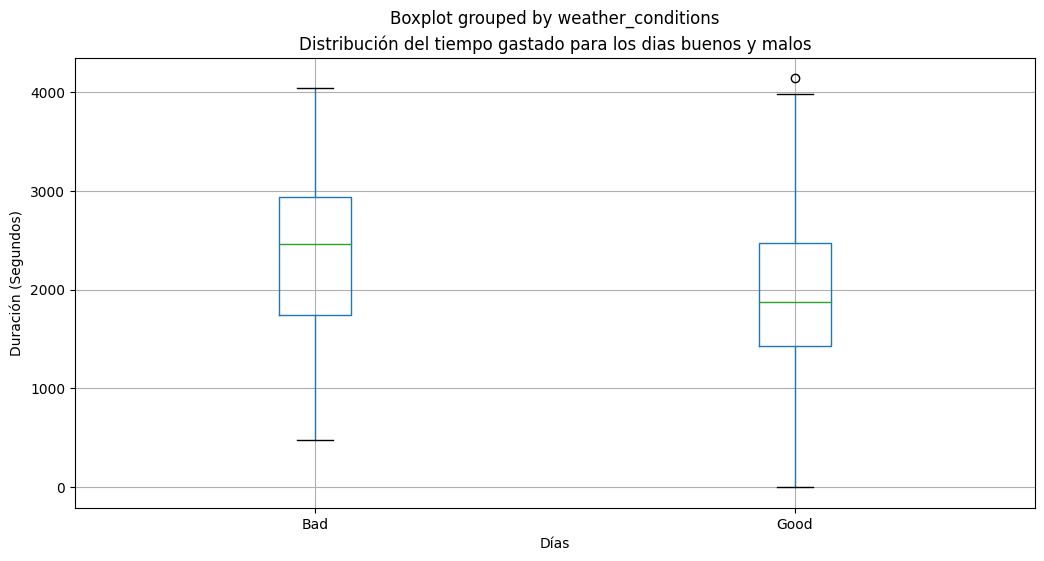

In [62]:
# Visualizar valores atipicos con diagrama de caja
df_clima.boxplot(column='duration_seconds', by='weather_conditions', figsize=(12, 6))
plt.title('Distribución del tiempo gastado para los dias buenos y malos')
plt.xlabel('Días')
plt.ylabel('Duración (Segundos)')
plt.show()

cO
- En los dias buenos hay menos dispersión entre sus valores promedió, comparado con los dias lluviosos. 


Resultado de la prueba de hipotesis

- la prueba nos da a entender que muy probablemente el promedio de los viajes cambia dependiendo el clima.



## Conclusion general

En este proyecto, analizamos la cantidad de viajes realizados por diferentes empresas y evaluamos si el factor externo como el clima afecta para identificar patrones que pueden predecir el exito de una empresa relacionada en viajes de taxis. Encontramos que:

- Los 4 barrios mas concurridos por los pasajeros son Loop, River North, Streeterville y West Loop.
- La empresa que mas realizo viajes de taxi entre el 15 y 16 de noviembre fue Flash Cab.

Las hipótesis formuladas sobre "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos", fueron probadas y los resultados indican que muy probablemente el promedio de los viajes cambia dependiendo el clima.

Estos hallazgos nos permiten planificar mejor un lanzamiento, enfocarnos en las preferencias de los pasajeros, para tener un mejor crecimiento empresarial.